# Introduction to timeseries

In time series data, there are several types of patterns that can occur:

- Trend: A long-term upward or downward movement in the data, indicating a general increase or decrease over time.
- Seasonality: A repeating pattern in the data that occurs at regular intervals, such as daily, weekly, monthly, or yearly.
- Cycle: A pattern in the data that repeats itself after a specific number of observations, which is not necessarily related to seasonality.
- Irregularity: Random fluctuations in the data that cannot be easily explained by trend, seasonality, or cycle.
- Autocorrelation: The correlation between an observation and a previous observation in the same time series.
- Outliers: Extreme observations that are significantly different from the other observations in the data.
- Noise: Unpredictable and random variations in the data.

By identifying these patterns in time series data, analysts can better understand the underlying structure and make more accurate forecasts.

# 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import seaborn as sns 

# 2. Loading data

In [6]:
sharing_data = pd.read_csv("https://raw.githubusercontent.com/Esther-Velasco/esther_labs/main/Final%20Project/london_merged.csv")
sharing_data.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<Axes: >

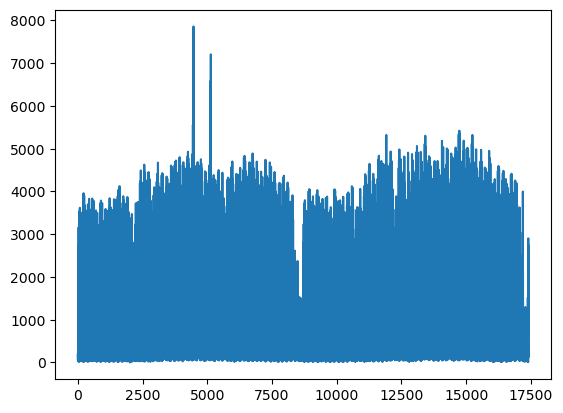

In [7]:
# first preview of the data
sharing_data['cnt'].plot()

# 3. Data understanding and cleaning

In [8]:
sharing_data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


Using the .describe() method to check for insconsistencies.
There seems to be no inconsistent data, with aggregated statistics having expected values (mean, min, max belong to their intervall).
Min/Max values seem to be in reasonable scales.
Let´s plot the data to do another check.

## Checking null values

In [9]:
#None
sharing_data.isna().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

## Checking dupplicates

In [10]:
#none as well
sharing_data.duplicated().sum()

0

## Pandas DATETIME index

In [11]:
sharing_data.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [12]:
#Since I am working with time-series data:
#converting to a pandas day-time object and setting the index in the date-time for the time series analysis
sharing_data["timestamp"] = pd.to_datetime(sharing_data["timestamp"])
sharing_data = sharing_data.set_index("timestamp")

In [13]:
sharing_data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [14]:
print("The earliest date in the dataset: {}".format(min(sharing_data.index)))

The earliest date in the dataset: 2015-01-04 00:00:00


In [15]:
sharing_data.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [16]:
print("The latest date in dataset: {}".format(max(sharing_data.index)))

The latest date in dataset: 2017-01-03 23:00:00


## Cleaning column names for readability

In [17]:
sharing_data.rename(columns = {"cnt":"total_count","t1":"real_temperature","t2":"felt_temperature","hum":"humidity"}, inplace = True)

In [18]:
sharing_data

,total_count,real_temperature,felt_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


## Plot the data for understanding and identifying inconsistencies. 

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

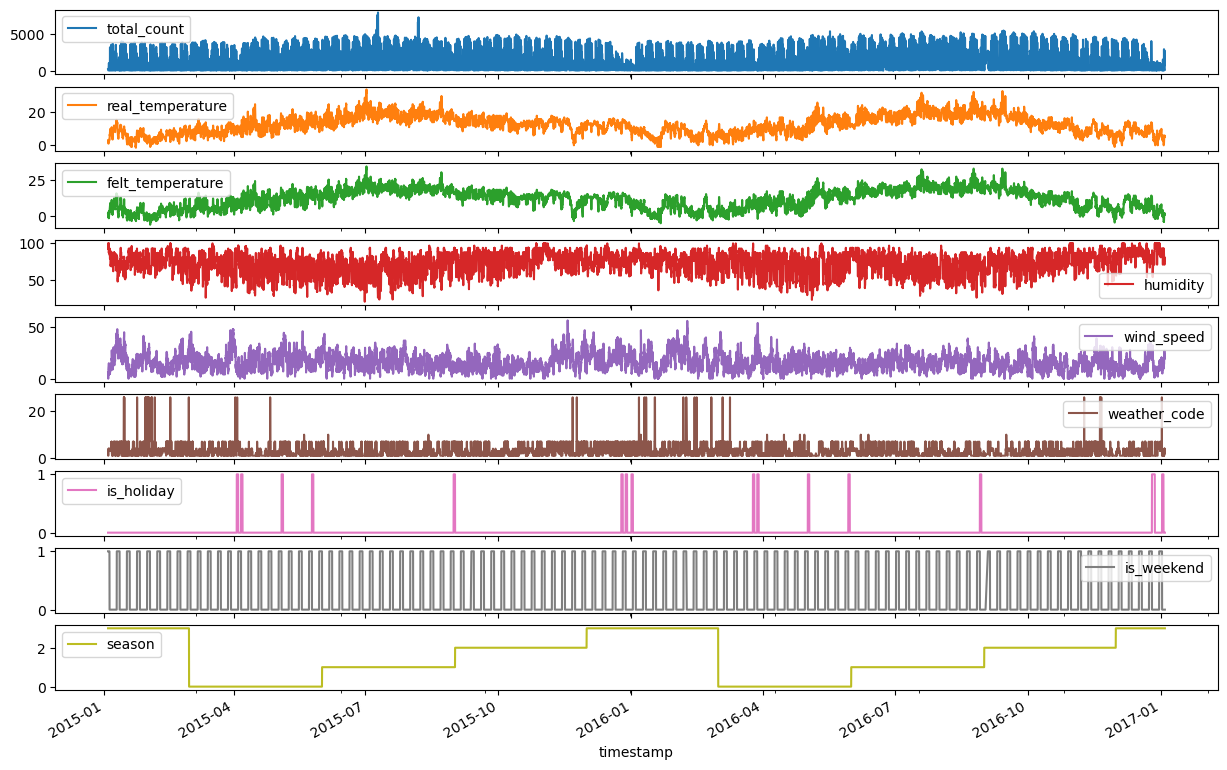

In [20]:
sharing_data.plot(subplots=True, figsize=(15, 10))

Plots above help identifying seasonality.

Hint: 
- Seasonality: In time-series data, seasonality is the presence of variations that occur at specific regular time intervals less than a year, such as weekly, monthly, or quarterly.

First guesses:
- From the plots above we can appreciate the increasing temperatures in summer and the decreasing in winter, together with the season cycles. The count of sharing bikes used seems to be correlated to the temperature (warmest months showcase higher usage). Finally, is_weekend variable seems correct having a consistent and cyclic recurrence.

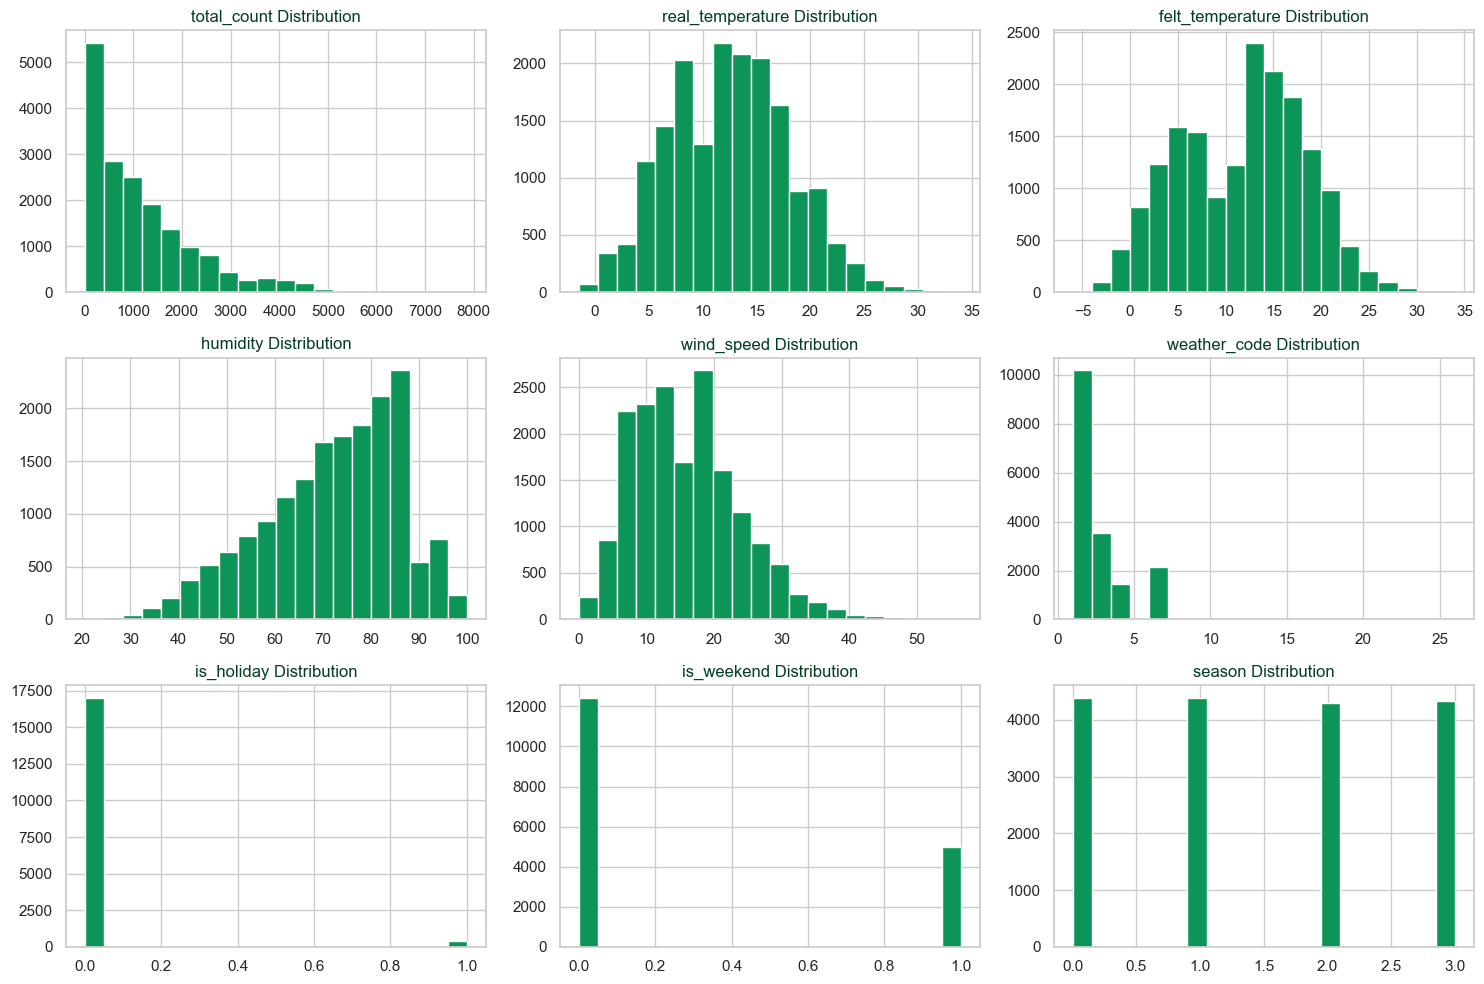

In [21]:
# Create distribution plots for each variable in the dataframe, 3 columns and 3 rows. 
sns.set(style="whitegrid")
fig, axs = plt.subplots(3,3, figsize = (15,10))

#Convert 2D array of subplots into a 1D array --> to iterate over the subplots.
axs = axs.ravel()

#Iterate over the columns of the sharing_data DF, and i is the index of the current column.
for i, column in enumerate(sharing_data.columns):
    #For each subplot (axs[i]), create a histogram using the data in the current column (sharing_data[column]). 
    axs[i].hist(sharing_data[column], bins=20,facecolor="#0D9557")
    axs[i].set_title('{} Distribution'.format(column),color="#033E23")
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()  
plt.show()

# 4. Data Resampling

Resampling is a methodology of economically using a data sample to improve the accuracy and quantify the uncertainty of a population parameter. Resampling for months or weeks and making bar plots is another very simple and widely used method of finding seasonality.

Bellow, i am implementing resampling for the sharing data between jan. 2015 and jan. 2017.

## Preeliminar observation of data: whole dataset

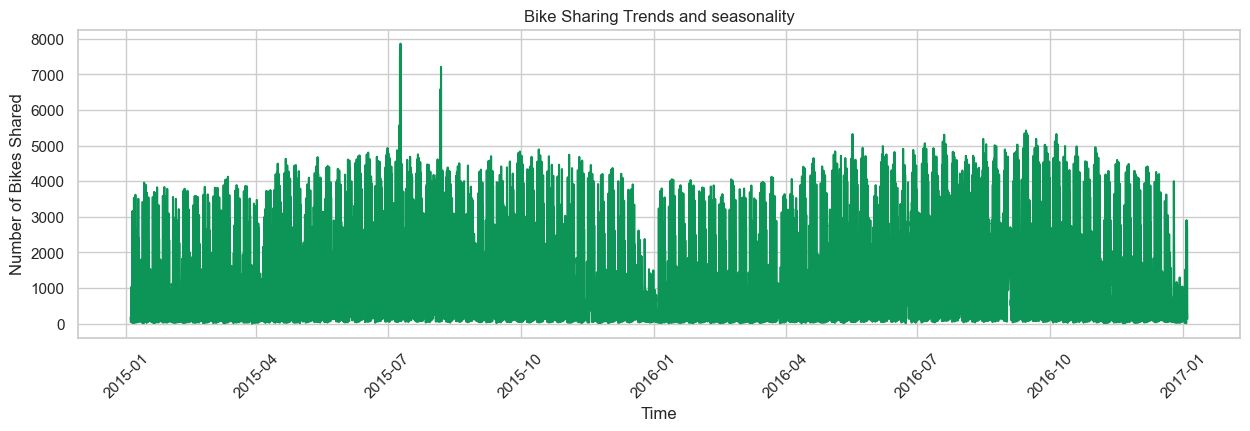

In [22]:
#visualizing the trends of the data during the whole timestamp.
# There seems to be two peaks from july to october in 2017, and a notable decreasy in winter 2016 and 2017 compared to january 2015.

sns.set(style="whitegrid") 
plt.figure(figsize=(15, 4)) 
sns.lineplot(x=sharing_data.index, y=sharing_data['total_count'], color='#0D9557')

# Adding labels and title
plt.ylabel("Number of Bikes Shared")
plt.xlabel("Time")
plt.title("Bike Sharing Trends and seasonality")

plt.xticks(rotation=45)
plt.show()


## Yearly observations (2 years)

<Figure size 1000x400 with 0 Axes>

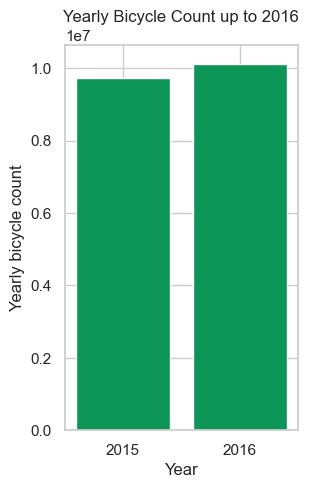

In [23]:
yearly_counts = sharing_data['total_count'].resample('Y').sum()
plt.figure(figsize=(10, 4)) 

yearly_counts_2016 = yearly_counts[yearly_counts.index.year <= 2016]

plt.figure(figsize=(3, 5)) 

# Plot yearly bicycle count
plt.bar(yearly_counts_2016.index.year, yearly_counts_2016, color='#0D9557')

plt.ylabel('Yearly bicycle count')
plt.xlabel('Year')
plt.title('Yearly Bicycle Count up to 2016')

plt.xticks([2015, 2016])

plt.show()

Data suggests that there is an increase in bike usage over time. Later on we will do an ARIMA model to forecast demand.

## Monthly observations
We can appreciate seasonality as expected in the biking behaviours during the year in a city like London: in warmer months bicycle counts increase, and decrease in winter months. 2016s winter seemed to have been warmer, or something else might explain why the count decrease was not as high as that of the one in 2015 and 2017.

Text(0.5, 1.0, 'Average Monthly Bicycle count over time')

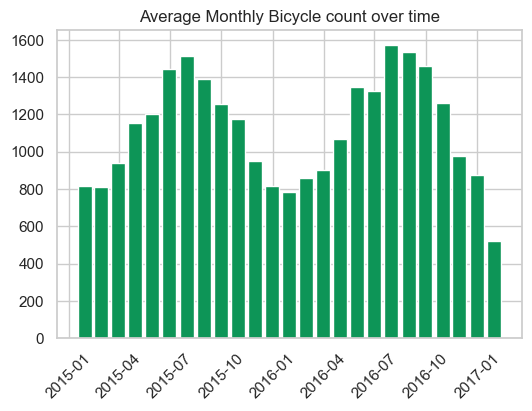

In [125]:
# Resampling the time series data based on monthly 'M' frequency
df_month = sharing_data.resample("M").mean()

# using subplot
fig, ax = plt.subplots(figsize=(6, 4))
 
# plotting bar graph
ax.bar(df_month['2015':].index, 
       df_month.loc['2015':, "total_count"], 
       width=25, align='center', color='#0D9557')

plt.xticks(rotation=45)
plt.title('Average Monthly Bicycle count over time')



Above we have 25 bars representing each month of the dataset, from jan 2015 to january 2017 included.

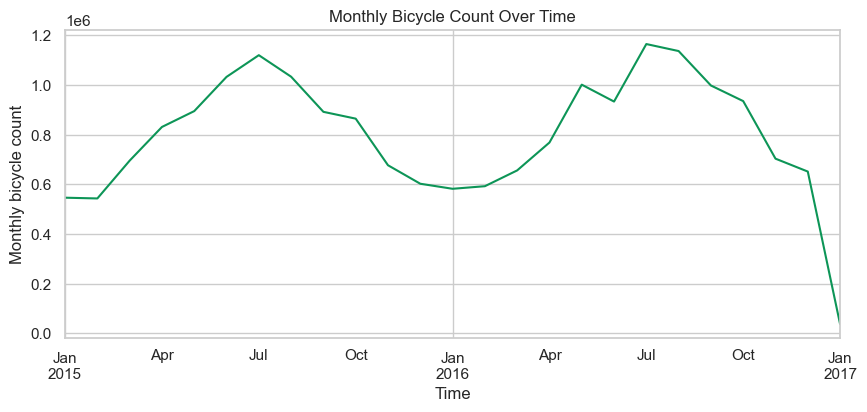

In [25]:
plt.figure(figsize=(10, 4)) 
weekly = sharing_data['total_count'].resample('M').sum()
weekly.plot(style='-', color='#0D9557')
plt.ylabel('Monthly bicycle count')
plt.xlabel('Time')
plt.title('Monthly Bicycle Count Over Time')

plt.show()

## Resampling to daily observations

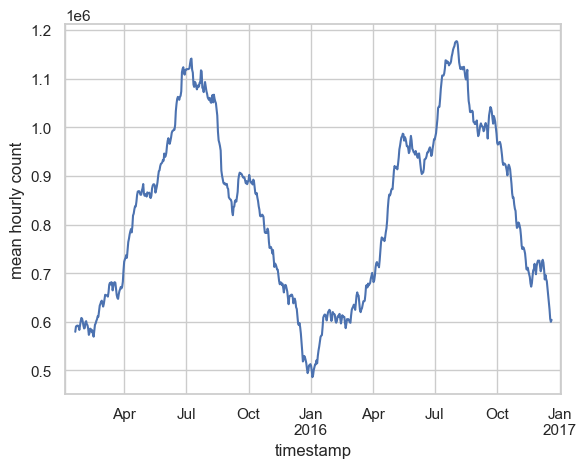

In [26]:
#rolling mean to see the daily usage over time
sharing_data_daily = sharing_data.resample('D').sum()
sharing_data_daily["total_count"].rolling(30, center=True).sum().plot(style=['-', ':', '--'])
plt.ylabel('mean hourly count');

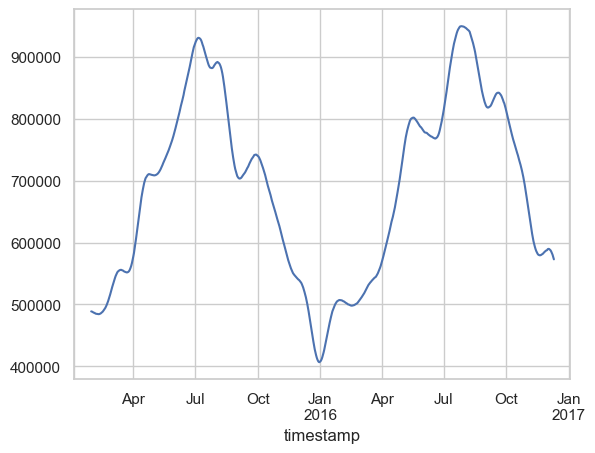

In [27]:
# a smoother representation using Gauss
sharing_data_daily["total_count"].rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['-', ':', '--']);

In [28]:
# Group the data by day of week and get the average of 'total_count' column
sharing_data_daily_grouped = sharing_data_daily.groupby(sharing_data_daily.index.dayofweek).mean()

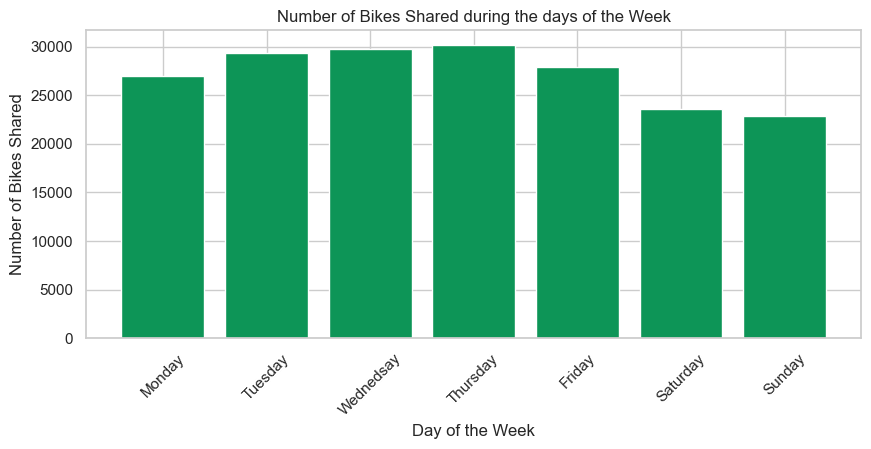

In [29]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4)) 
plt.bar(sharing_data_daily_grouped.index, sharing_data_daily_grouped["total_count"], color='#0D9557')
plt.xticks(range(7), ["Monday", "Tuesday", "Wednedsay", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Bikes Shared")
plt.title("Number of Bikes Shared during the days of the Week")
plt.show()

We can observe an increasing use of the bike sharing service at the beginning of the week, peaking on Thursday, and then decreasing reaching its lowest on weekends.

## Hourly throughout a working day

We can see a strong distinction between weekday and weekend totals.

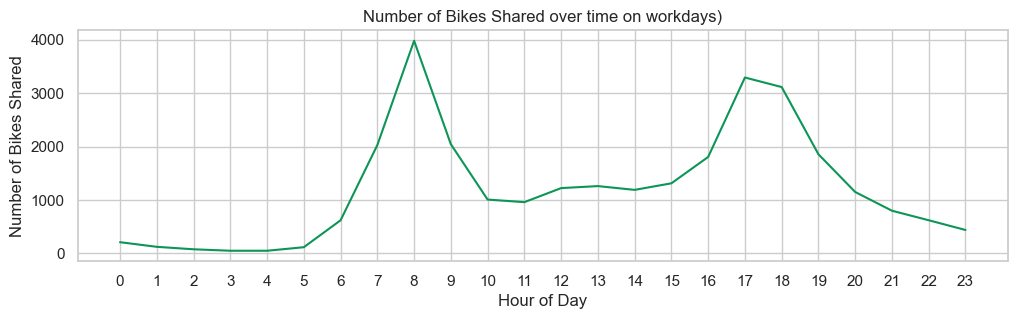

In [101]:
data_workdays = sharing_data[(sharing_data["is_holiday"] == 0) & (sharing_data["is_weekend"] == 0)]
data_workdays_hourly = data_workdays.groupby(data_workdays.index.hour)['total_count'].mean()

# plot
fig = plt.figure(figsize = (12,3))
plt.plot(data_workdays_hourly.index, data_workdays_hourly.values, color = "#0D9557")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time on workdays)')

# hourly division
plt.xticks(range(0,24))

plt.show()


## Hourly throughout Holidays / Weekends

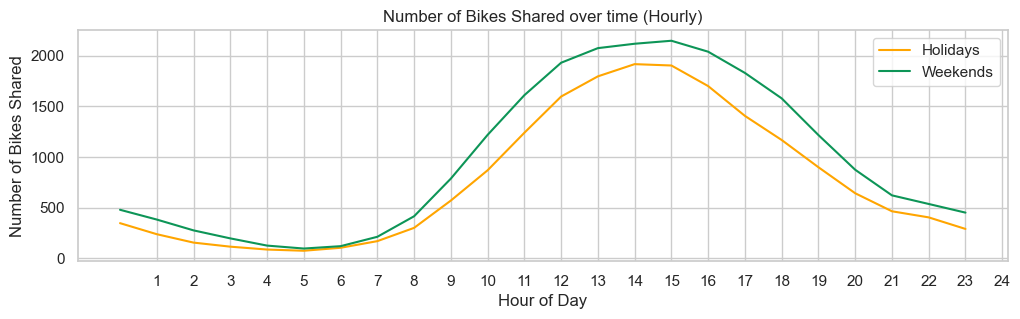

In [103]:
data_holidays = sharing_data[sharing_data["is_holiday"] == 1]
data_holidays_hourly = data_holidays.groupby(data_holidays.index.hour)['total_count'].mean()

data_weekends = sharing_data[sharing_data["is_weekend"] == 1]
data_weekends_hourly = data_weekends.groupby(data_weekends.index.hour)['total_count'].mean()

# plot the hourly counts for holidays and weekends on the same graph
fig = plt.figure(figsize=(12,3))
plt.plot(data_holidays_hourly.index, data_holidays_hourly.values, label='Holidays', color = "orange")
plt.plot(data_weekends_hourly.index, data_weekends_hourly.values, label='Weekends', color = "#0D9557")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Hourly)')
plt.legend()

# include xticks every hour
plt.xticks(range(1,25))

plt.show()

## Temperature impact on bike usage

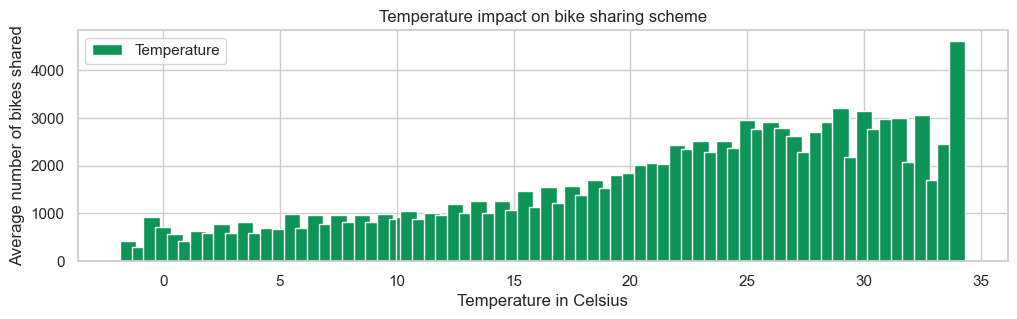

In [111]:
# group data by t1_bins and t2_bins and get the average cnt
data_t1 = sharing_data.groupby('real_temperature')['total_count'].mean()
data_t2 = sharing_data.groupby('felt_temperature')['total_count'].mean()

# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(12, 3))

# ploting
ax.bar(data_t1.index, data_t1.values, width=0.7, label='Temperature', color = "#0D9557")

# add x-axis labels, y-axis label, and title
ax.set_xlabel('Temperature in Celsius')
ax.set_ylabel('Average number of bikes shared')
ax.set_title('Temperature impact on bike sharing scheme')

# add legend
ax.legend()

# show the plot
plt.show()

## Weather impact on bike usage

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 
- 94 = Freezing Fog

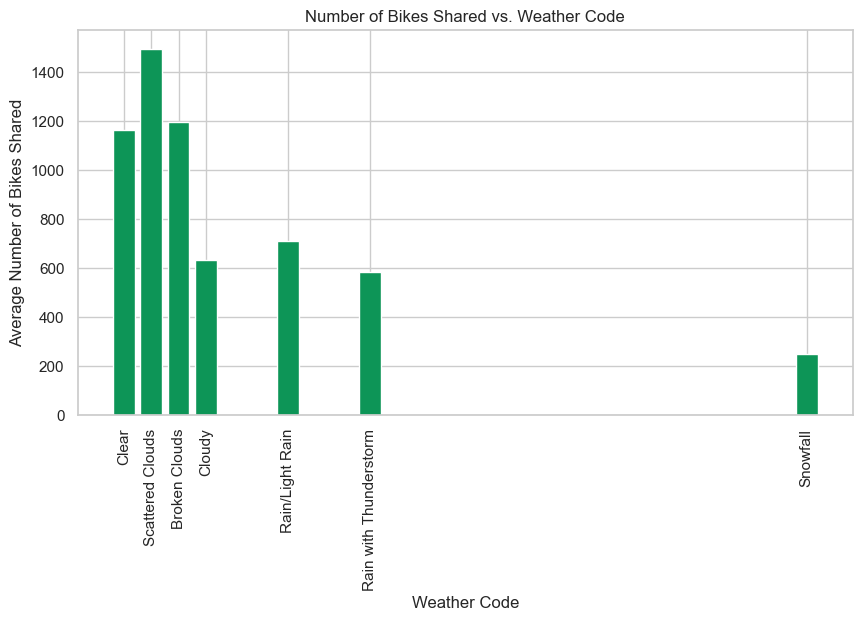

In [124]:
data_weather = sharing_data.groupby('weather_code')['total_count'].mean()

fig, ax = plt.subplots(figsize=(10, 5))
color = "#0D9557"
ax.bar(data_weather.index, data_weather.values, color=color)
ax.set_xlabel('Weather Code')
ax.set_ylabel('Average Number of Bikes Shared')
ax.set_title('Number of Bikes Shared vs. Weather Code')

# Labels
weather_labels = {
    1: 'Clear',
    2: 'Scattered Clouds',
    3: 'Broken Clouds',
    4: 'Cloudy',
    7: 'Rain/Light Rain',
    10: 'Rain with Thunderstorm',
    26: 'Snowfall'
}
ax.set_xticks(list(weather_labels.keys()))
ax.set_xticklabels([weather_labels[code] for code in weather_labels])
plt.xticks(rotation=90)


plt.show()


# 5. Differencing

Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

Differencing is a common technique for transforming a non-stationary time series into a stationary one. A stationary time series has constant mean, variance, and autocorrelation over time, which makes it easier to model and forecast.

<Axes: xlabel='timestamp'>

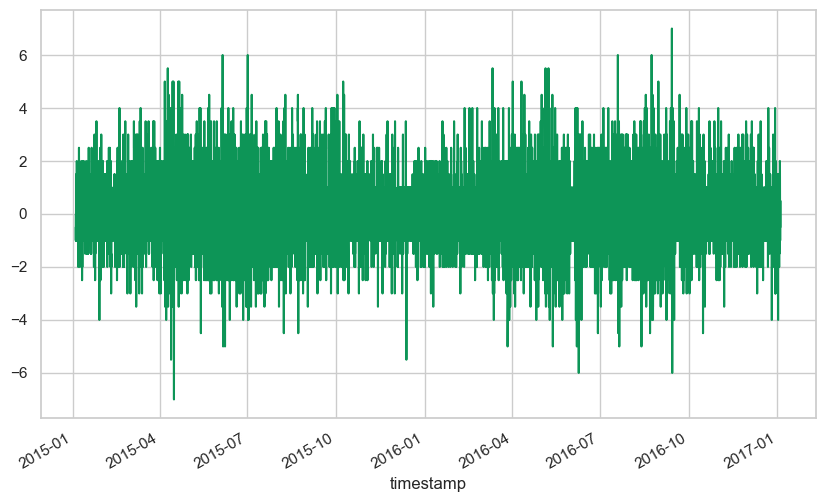

In [89]:
sharing_data.real_temperature.diff(2).plot(figsize=(10, 6), color='#0D9557')

<Axes: xlabel='timestamp'>

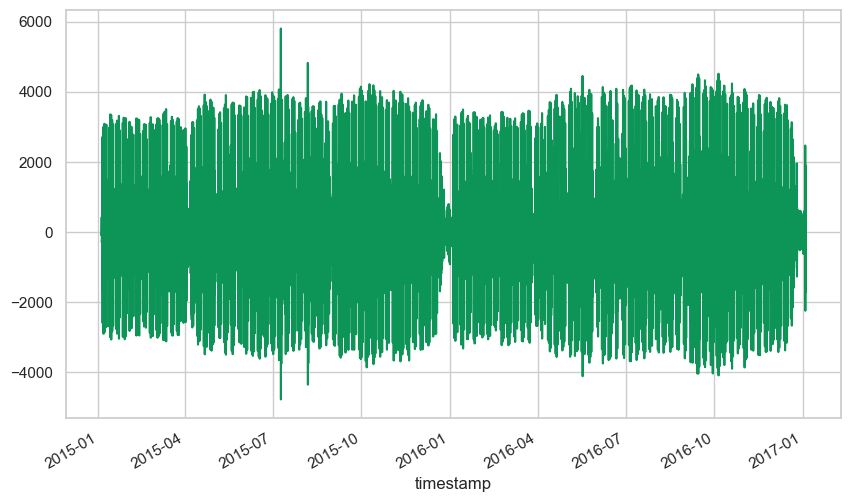

In [90]:
sharing_data.total_count.diff(2).plot(figsize=(10, 6), color='#0D9557')


<Axes: xlabel='timestamp'>

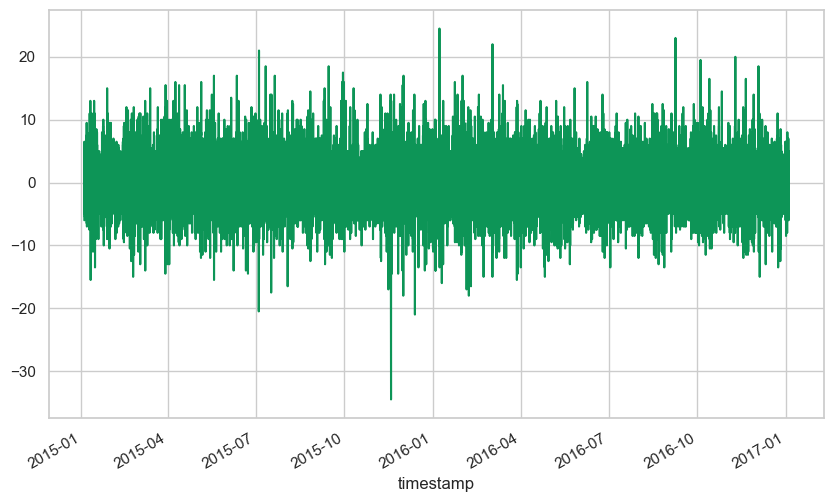

In [91]:
sharing_data.wind_speed.diff(2).plot(figsize=(10, 6), color='#0D9557')


<Axes: xlabel='timestamp'>

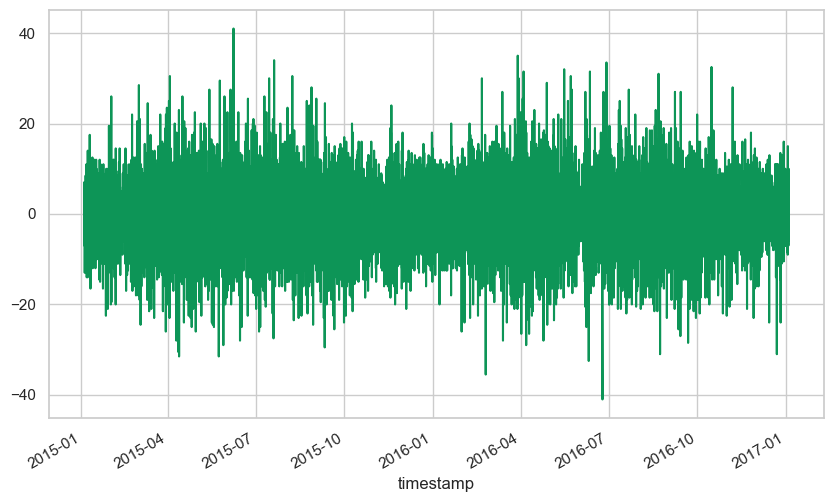

In [92]:
sharing_data.humidity.diff(2).plot(figsize=(10, 6), color='#0D9557')


# 6. Trend In The Dataset 

Trend helps identifying where the value of data is going in the future (upward, downward, stable...)

## Rolling mean method

<Axes: xlabel='timestamp'>

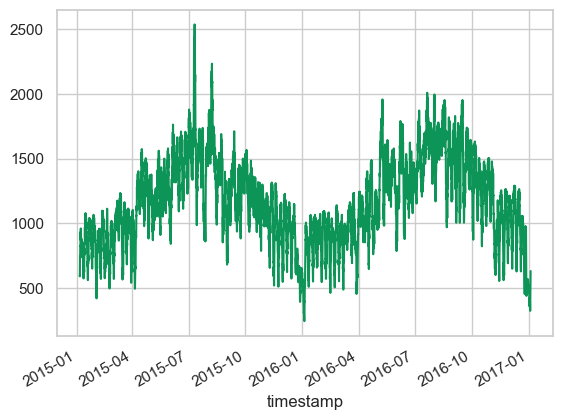

In [86]:
# Finding the trend in the "total_count" column using moving average method
window_size = 50
rolling_mean = sharing_data['total_count'].rolling\
            (window_size).mean()
rolling_mean.plot(color='#0D9557')

<Axes: xlabel='timestamp'>

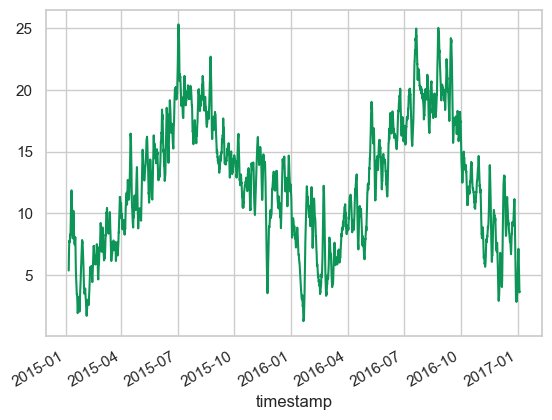

In [87]:
# Finding the trend in the "real_temperature" column using moving average method
window_size = 50
rolling_mean = sharing_data['real_temperature'].rolling\
            (window_size).mean()
rolling_mean.plot(color='#0D9557')

<Axes: xlabel='timestamp'>

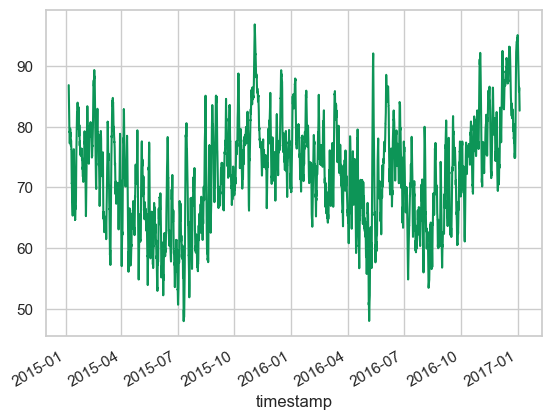

In [88]:
# Finding the trend in the "humidity" column using moving average method
window_size = 50
rolling_mean = sharing_data['humidity'].rolling\
            (window_size).mean()
rolling_mean.plot(color='#0D9557')

## Linear Regression Modelling: daily_data

In [42]:
daily_data

,total_count,real_temperature,felt_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,holiday,daylight_hrs
timestamp,,,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,0.0,8.341865
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,0.0,8.360469
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,0.0,8.380317
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0,0.0,8.401395
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0,0.0,8.423685
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0,0.0,8.273957
2016-12-31,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0,0.0,8.286777
2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0,0.0,8.300906


In [43]:
daily_data.index = pd.date_range(start=daily_data.index.min(), periods=len(daily_data), freq="D")

In [44]:
#using another LRModel

In [45]:
print(daily_data.columns)

Index(['total_count', 'real_temperature', 'felt_temperature', 'humidity',
       'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season',
       'holiday', 'daylight_hrs'],
      dtype='object')


In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
X = daily_data.drop('total_count', axis=1)
y = daily_data['total_count']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)

In [49]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [50]:
y_pred = model.predict(X_test)
y_pred

array([36406.39378188, 34072.61619242, 40106.53478237, 32830.78598665,
       31744.05699848, 38079.43072868, 36264.90973721, 39618.76973614,
       39819.63027192, 33951.85242148, 27459.55466303, 25866.30406024,
       36273.8514983 , 43440.00789732, 45080.74724258, 44044.54739   ,
       41158.24927916, 35072.07581429, 29687.16557291, 32020.88107931,
       40417.57167718, 37776.99509615, 37912.47178627, 19999.71070209,
       21392.82962922, 28294.72782524, 31562.76518254, 37924.99699742,
       39888.60748281, 38769.92791011, 36041.93996498, 27828.86337338,
       32458.37765127, 39825.06846349, 44013.29132293, 42960.52342789,
       40960.5078312 , 27481.78470106, 24662.51389727, 27459.57412896,
       33347.8197232 , 30852.82180962, 36669.25151367, 34216.25015015,
       33984.52222045, 32187.24253835, 27913.64761025, 33619.17809908,
       32367.85446539, 32867.0604235 , 28679.14864953, 31708.87782873,
       19481.41358687, 23770.88995988, 32903.45260995, 30349.60177763,
      

In [51]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
model_mse = mse(y_test, y_pred)

model_r2 = r2(y_test,y_pred)

model_rmse = np.sqrt(model_mse)

model_mse, model_r2, model_rmse

(30359583.545521665, 0.6422703111436072, 5509.953134603022)

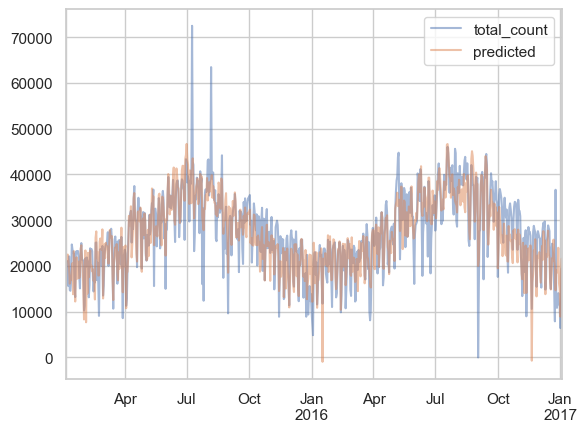

In [52]:
daily_data['predicted'] = model.predict(X)
daily_data[['total_count', 'predicted']].plot(alpha=0.5);

In [53]:
y_pred_df = pd.DataFrame(y_pred, index = X_test.index)
y_pred_df

,0
2016-08-10,36406.393782
2016-08-11,34072.616192
2016-08-12,40106.534782
2016-08-13,32830.785987
2016-08-14,31744.056998
...,...
2016-12-30,16229.791213
2016-12-31,15006.492031
2017-01-01,8919.501848
2017-01-02,18703.715092


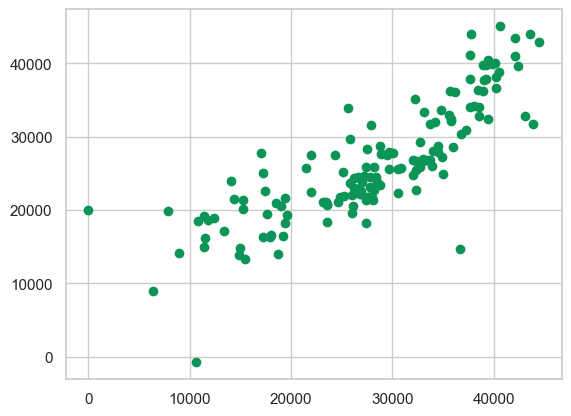

In [54]:
# y_pred vs y_test
plt.scatter(x=y_test, y = y_pred,color='#0D9557')


<Axes: >

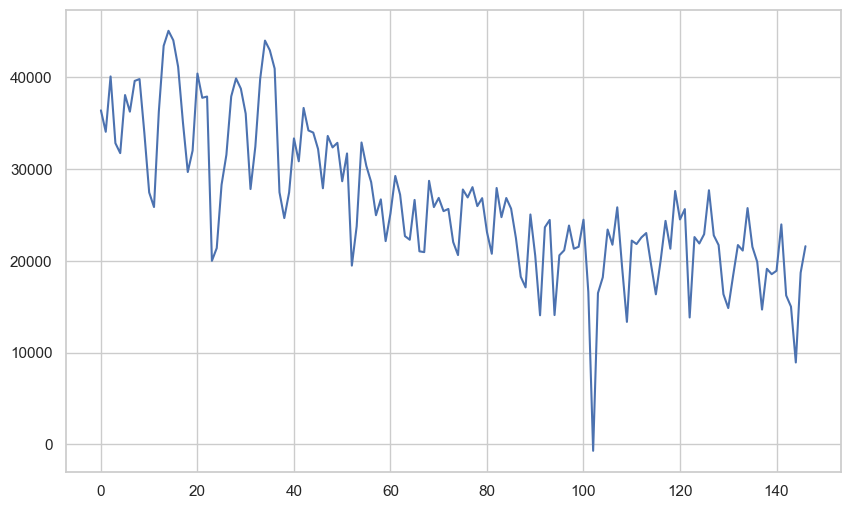

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(y_pred)

## Another way of doing a linear regression: using past values with .shift()

In [56]:
X = daily_data['total_count'].shift(1)
y = daily_data['total_count']

X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

display(X_df,y_df)

,total_count
2015-01-04,NaN
2015-01-05,9234.0
2015-01-06,20372.0
2015-01-07,20613.0
2015-01-08,21064.0
...,...
2016-12-30,14052.0
2016-12-31,11566.0
2017-01-01,11424.0
2017-01-02,6421.0


,total_count
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421
2017-01-02,11823


In [57]:
X_df.drop(index=X_df.index[0], axis=0, inplace=True)

In [58]:
y_df.drop(index=X_df.index[0], axis=0, inplace=True)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42, shuffle = False)

In [60]:
X_train

,total_count
2015-01-05,9234.0
2015-01-06,20372.0
2015-01-07,20613.0
2015-01-08,21064.0
2015-01-09,15601.0
...,...
2016-08-06,35991.0
2016-08-07,41885.0
2016-08-08,38076.0
2016-08-09,37769.0


In [61]:
y_train.shape

(584, 1)

In [62]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [63]:
X_test.dropna(inplace = True)

In [64]:
y_test.dropna(inplace = True)

In [65]:
y_pred = model.predict(X_test)
y_pred

array([[35124.42749496],
       [34555.25463209],
       [36348.4323207 ],
       [38388.6763391 ],
       [38959.97298131],
       [36402.94265707],
       [35464.94011565],
       [37962.50461839],
       [35515.91081979],
       [26036.77570309],
       [25171.68958565],
       [27895.79055122],
       [33186.83281128],
       [37694.20049523],
       [36705.93517611],
       [34637.37409986],
       [34605.51740978],
       [30705.55061681],
       [26218.00487336],
       [32112.90839216],
       [35862.7947785 ],
       [35520.15837847],
       [35719.08570989],
       [ 7918.81416153],
       [18725.31136514],
       [27395.28655365],
       [27650.84800078],
       [34557.37841143],
       [36105.6135496 ],
       [36628.77119346],
       [33511.06312371],
       [20010.19786527],
       [35813.23992726],
       [35712.71437188],
       [38765.29320856],
       [39405.96664251],
       [37747.2949787 ],
       [23469.83440861],
       [27161.67082635],
       [28776.45105049],


In [66]:
y_pred_df = pd.DataFrame(y_pred, index = X_test.index)

In [67]:
result_df = pd.concat([y_test, y_pred_df], axis=1)
result_df.columns = ['y_test', 'y_pred']
result_df

,y_test,y_pred
2016-08-11,37626,35124.427495
2016-08-12,40159,34555.254632
2016-08-13,43041,36348.432321
2016-08-14,43848,38388.676339
2016-08-15,40236,38959.972981
...,...,...
2016-12-30,11566,17866.596586
2016-12-31,11424,16106.691440
2017-01-01,6421,16006.165885
2017-01-02,11823,12464.409874


In [68]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
model_mse = mse(y_test, y_pred_df)

model_r2 = r2(y_test,y_pred_df)

model_rmse = np.sqrt(model_mse)

model_mse, model_r2, model_rmse

(49644205.639627315, 0.4139934610381216, 7045.864435229173)

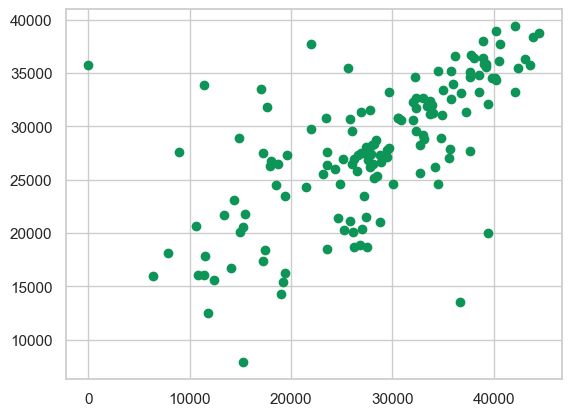

In [69]:
# y_pred vs y_test
plt.scatter(x=y_test, y = y_pred_df,color='#0D9557')


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

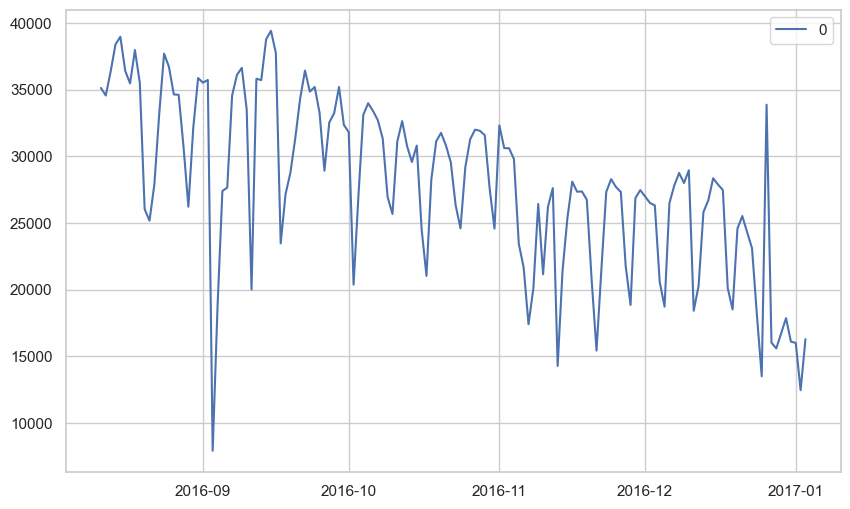

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(y_pred_df)

### Feature Importance

In [72]:
model.coef_

array([[0.70792645]])

In [73]:
model.intercept_

array([7918.81416153])

In [74]:
coefs = np.array(model.coef_) #.reshape(12,)
result = coefs.flatten()

result

array([0.70792645])

In [75]:
fi_df  = pd.DataFrame({'var':X_train.columns, 'coef':result})
fi_df

,var,coef
0,total_count,0.707926


# 7. ARIMA -> Google Colab doc.

Among the components of a Time Series we can find ETS Decomposition.

ETS Decomposition is used to separate different components of a time series. The term ETS stands for 
- Error (Residuals),
- Trend, 
- and Seasonality (behaviours of a single season --> here summer)

Decomposition is used for analyzing time series data and forecasting.

Decomposition process requires you to specify a technique for the season component. There are two techniques for combining individual components:

- Additive (default): individual components (trend, seasonality and residual components are added.

             y = T + S + R

      An additive trend meaning a linear trend.
      Additive seasonality meaning same frequency and amplitude of seasonal cycles.
   
- Multiplicative : individual components (trend, seasonality and residual components are multiplied.

             y = T * S * R

      A multiplicative trend meaning a curved trend line.
      Multiplicative seasonality meaning changes in frequency and amplitude of seasonal cycles.


In this use case of sharing bikes, trend seems to have a multiplicative component, but seasonality looks additive with similar frequency and amplitude of seasonal cycles. 

In [76]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [77]:
arima_data = sharing_data.resample("D").sum()
arima_data = arima_data.rename(columns={'total_count': 'daily_count'})

# Set the frequency explicitly
arima_data.index = pd.date_range(start=arima_data.index.min(), periods=len(arima_data), freq='D')

# Verify the result
print(arima_data.index.freq)


<Day>


In [78]:
print(arima_data.isnull().sum())


daily_count         0
real_temperature    0
felt_temperature    0
humidity            0
wind_speed          0
weather_code        0
is_holiday          0
is_weekend          0
season              0
dtype: int64


There seems to be missing values somewhere.

In [79]:
arima_data.fillna(method='ffill')

,daily_count,real_temperature,felt_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0
...,...,...,...,...,...,...,...,...,...
2016-12-30,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0
2016-12-31,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0
2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0
2017-01-02,11823,89.5,22.5,1995.5,268.0,29.0,24.0,0.0,72.0


In [80]:
zero_negative_rows = arima_data[arima_data['daily_count'] <= 0]
zero_negative_rows

,daily_count,real_temperature,felt_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
2016-09-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
#Replacing 0 or negative values in the DF with positive values to apply seasonal_decompose
positive_value = 0.01  # or any other small positive value
arima_data['daily_count'] = arima_data['daily_count'].apply(lambda x: x if x > 0 else positive_value)

### Seasonal decompose

In [82]:
result = seasonal_decompose(arima_data["daily_count"],
                            model='multiplicative')

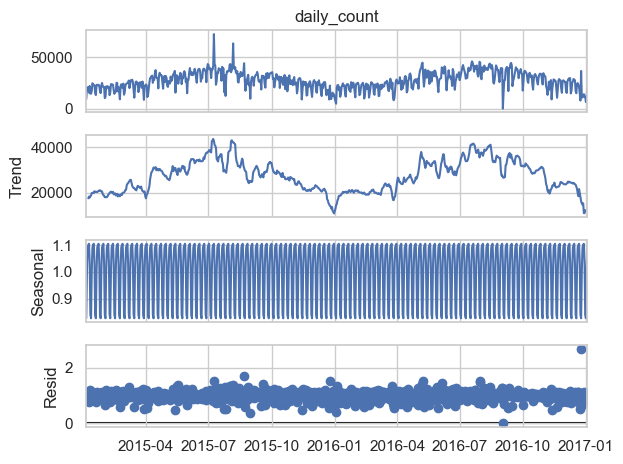

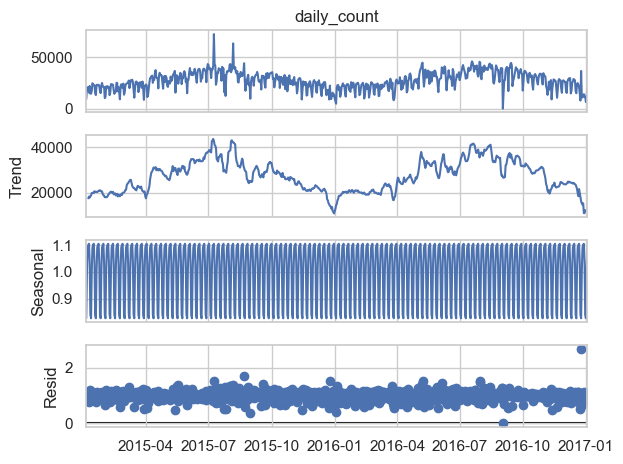

In [83]:
result.plot()

### ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: 
- (p, d, q).

AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

### Types of ARIMA Model

ARIMA:Non-seasonal Autoregressive Integrated Moving Averages

SARIMA:Seasonal ARIMA

SARIMAX:Seasonal ARIMA with exogenous variables

Pyramid Auto-ARIMA

The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.